In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt

# Market Data analysis on BTC/USDT PERP vs SPOT on Binance

The pair BTC/USDT trades on Binance as spot and perpetual contracts. The perpetual contract trades higher volume due to its leveraged nature and the lower fee. The takers fee for a Non-VIP user for spot and perpetual contracts are 10 bps and 5 bps, respectively, for example. The market data on July 1st, 2024 is used for following analysis.

# Trading Volume

For the 24 hour period, the perpetual contract has traded USD 12.2 Bn and the spot contract traded USD 1.6 M. The notional volume per minute is shown in the plot.

In [2]:
dft1 = pd.read_pickle('dft_perp.pickle')
dft2 = pd.read_pickle('dft_spot.pickle')

In [3]:
dft1.notional.sum() * 1e-9

np.float64(12.249639587552)

In [4]:
dft2.notional.sum() * 1e-9

np.float64(1.5511014742366411)

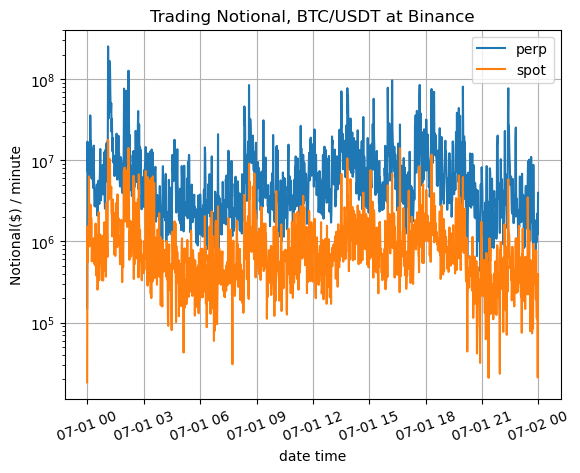

In [5]:
plt.plot(dft1.notional, label='perp')
plt.plot(dft2.notional, label='spot')
plt.yscale('log')
plt.xticks(rotation=20)
plt.grid()
plt.title('Trading Notional, BTC/USDT at Binance')
plt.xlabel('date time')
plt.ylabel('Notional($) / minute')
plt.legend()

# Top of the Book

The bid-ask spread calculated from the top of the book differs between spot and perpetual contracts. The spot has smaller price increment of 0.01, compared to that of 0.1 for the perpetual. Therefore, the minimum allowed bid-ask spread of the spot is lower. However, due to its lower liquidity, the spread of spot is usually much larger than that of the perpetual.

In [6]:
dfb1 = pd.read_pickle('dfb_perp.pickle')
dfb2 = pd.read_pickle('dfb_spot.pickle')

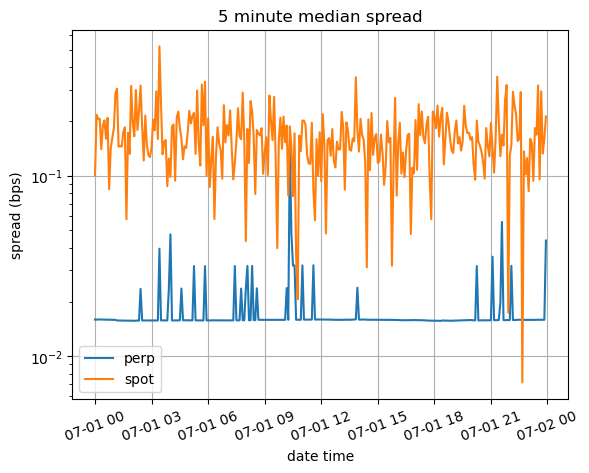

In [7]:
plt.plot(dfb1.spreadbp.resample('5min').median(), label='perp')
plt.plot(dfb2.spreadbp.resample('5min').median(), label='spot')
plt.yscale('log')
plt.title('5 minute median spread')
plt.xlabel('date time')
plt.ylabel('spread (bps)')
plt.xticks(rotation=20)
plt.grid()
plt.legend()

The imbalance between the available quantity on the bid and ask sides is usually a good indicator for the future price movement. Following plot shows the relationship between the average future return in the 1 minute horizon and the imbalance of the quoted sizes. Both perp and spot contracts show similar patterns. The graph shows that if a larger quantity is added to the bid side, the future price tends to move higher. By posting a large quantity, a trader would reveal his intention of taking a position in certain direction, and in response to that, other traders would adjust their prices so that they could execute at a favorable price. A trader might attempt to take advantage of such dynamics by placing a large quantity on the opposite side of his intended execution and manipulate the market so that he can get a better price in the near future on the opposite side. Such behavior can be detected if the identities of traders for each order is known.

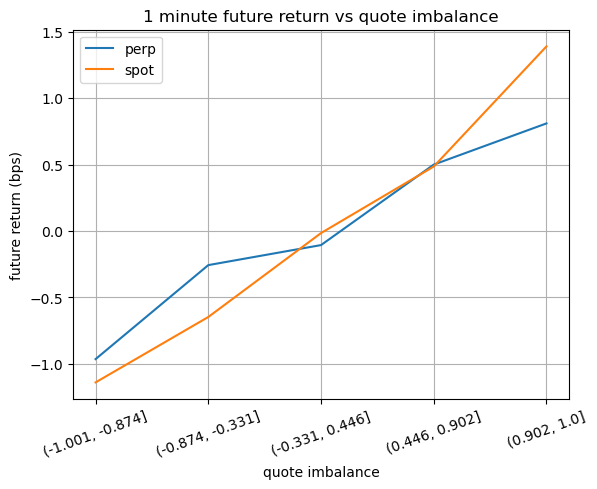

In [8]:
nbins = 5
ser1 = dfb1.groupby(pd.qcut(dfb1[f'maxqimb{2}m'], nbins, duplicates='drop'), observed=False).tar1m.mean()
ser2 = dfb2.groupby(pd.qcut(dfb2[f'maxqimb{2}m'], nbins, duplicates='drop'), observed=False).tar1m.mean()
plt.plot(range(len(ser1)), ser1.values, label='perp')
plt.plot(range(len(ser2)), ser2.values, label='spot')
plt.xticks(range(len(ser1)), ser1.index, rotation=20)
plt.title('1 minute future return vs quote imbalance')
plt.xlabel('quote imbalance')
plt.ylabel('future return (bps)')
plt.grid()
plt.legend()

# Depth of the Book

The liquidity profile of the spot and perp contracts are shown at the depth of the order book, as well. Following plots show the available quantity up to the depth of 1 bps and 10 bps for each contract, on bid and ask sides. It is obvious that the order book for the perpetual contract provide more liquidity.

In [9]:
dfd1 = pd.read_pickle('dfd_perp.pickle')
dfd2 = pd.read_pickle('dfd_spot.pickle')

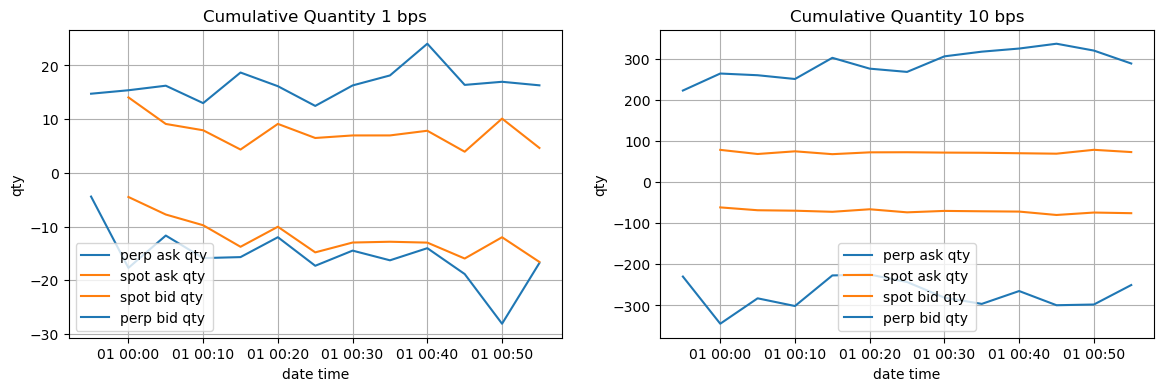

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Cumulative Quantity 1 bps')
plt.plot(dfd1.bidqty1bps.resample('5min').median(), color='C0', label='perp ask qty')
plt.plot(dfd2.bidqty1bps.resample('5min').median(), color='C1', label='spot ask qty')
plt.plot(dfd2.askqty1bps.resample('5min').median(), color='C1', label='spot bid qty')
plt.plot(dfd1.askqty1bps.resample('5min').median(), color='C0', label='perp bid qty')
plt.xlabel('date time')
plt.ylabel('qty')
plt.grid()
plt.legend()
plt.subplot(122)
plt.title('Cumulative Quantity 10 bps')
plt.plot(dfd1.bidqty10bps.resample('5min').median(), color='C0', label='perp ask qty')
plt.plot(dfd2.bidqty10bps.resample('5min').median(), color='C1', label='spot ask qty')
plt.plot(dfd2.askqty10bps.resample('5min').median(), color='C1', label='spot bid qty')
plt.plot(dfd1.askqty10bps.resample('5min').median(), color='C0', label='perp bid qty')
plt.xlabel('date time')
plt.ylabel('qty')
plt.grid()
plt.legend()